<a href="https://colab.research.google.com/github/ramzigoessing/loans_modified_project/blob/main/loans_modified_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Problem:**
In this dataset the goal is to predict if someone is approved getting a loan or not.

**Process:**
First we clean the data, than impute the missing values and last dropped unnecessary features.

**Solution:**
We decided that this is a classification problem, so we tried multiple alogrithms and we found out with logistic regression we got the highest results.

**Results:**
This is an imbalanced problem, so we dont care about the accuracy, but mostly about the recall and precision.

**At the end we got a precision 84% and recall of 80%.**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay

In [ ]:
# Loading the dataset and printing the first 5 rows.
data = pd.read_csv("loans_modified.csv")
print(data.shape)
data.head()

(563, 13)


,loan_id,gender,married,dependents,education,self_employed,applicant_income,coapplicant_income,loan_amount,loan_amount_term,credit_history,property_area,loan_status
0,LP001003,Male,Yes,1,Graduate,No,4583.0,1508.0,128.0,360.0,1.0,Rural,0.0
1,LP001005,Male,Yes,0,Graduate,NaN,3000.0,0.0,66.0,360.0,1.0,Urban,1.0
2,LP001006,Male,Yes,0,Not Graduate,No,2583.0,2358.0,120.0,360.0,1.0,Urban,1.0
3,LP001008,Male,No,0,Graduate,No,6000.0,0.0,141.0,360.0,1.0,Urban,1.0
4,LP001011,Male,Yes,2,Graduate,Yes,5417.0,4196.0,267.0,360.0,1.0,Urban,1.0


In [ ]:
# Checking the dataset on nan values and also the size.
print(data.shape)
display(data.isna().sum())

(563, 13)


,0
loan_id,29
gender,29
married,19
dependents,32
education,22
self_employed,34
applicant_income,26
coapplicant_income,34
loan_amount,30
loan_amount_term,28


In [ ]:
# Dropping the id column, because it is not necessary for the ML-Model to predict the target column.
data = data.drop('loan_id', axis=1)

In [ ]:
# Imputation of numerical features, with median.
columns_to_fill_median = ['applicant_income', 'coapplicant_income', 'loan_amount', 'loan_amount_term', 'credit_history']

for col in columns_to_fill_median:
    median_value = data[col].median()
    data[col].fillna(median_value, inplace=True)

/tmp/ipython-input-4156508164.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[col].fillna(median_value, inplace=True)


In [ ]:
# Imputation of categorical features, with mode.
categorical_cols = ['gender', 'married', 'dependents', 'education', 'self_employed', 'property_area']

for col in categorical_cols:
    mode_value = data[col].mode()[0]
    data[col].fillna(mode_value, inplace=True)

/tmp/ipython-input-3433538927.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[col].fillna(mode_value, inplace=True)


In [ ]:
# Dropping the nan values from the target feature.
data.dropna(subset=['loan_status'], inplace=True)

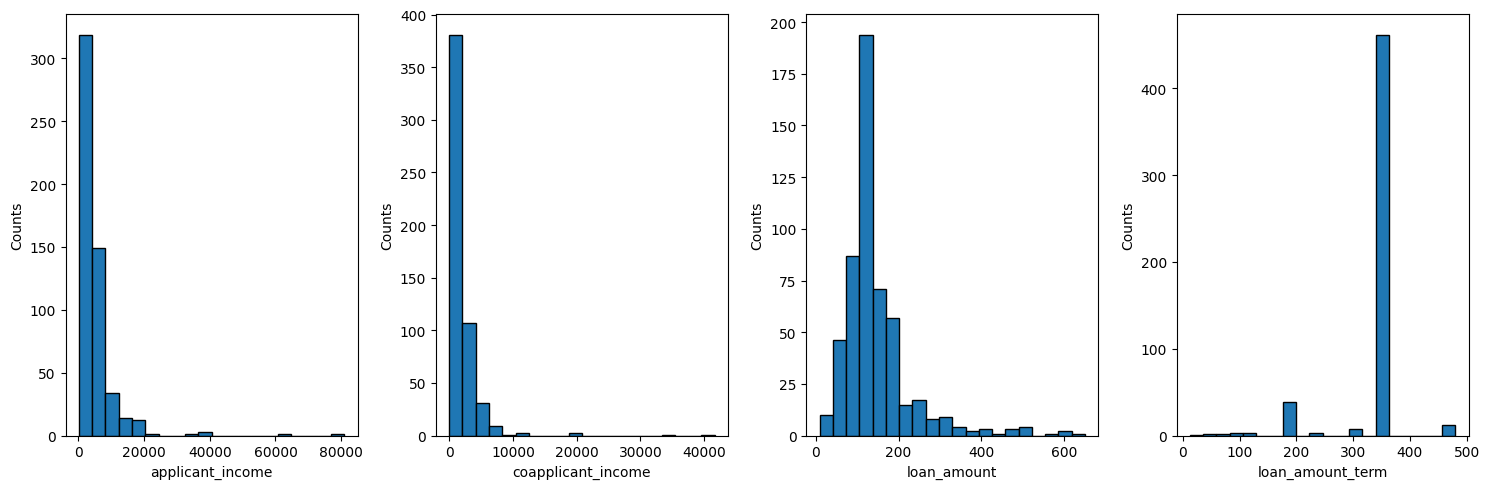

In [ ]:
# Plotting of numerical features.
num_features = ['applicant_income', 'coapplicant_income', 'loan_amount', 'loan_amount_term']

fig, axs = plt.subplots(1, 4, figsize=(15, 5))
axs = axs.flatten()

for i, col in enumerate(num_features):
    axs[i].hist(data[col], bins=20, edgecolor='black')
    axs[i].set_xlabel(col)
    axs[i].set_ylabel('Counts')

plt.tight_layout()
plt.show()

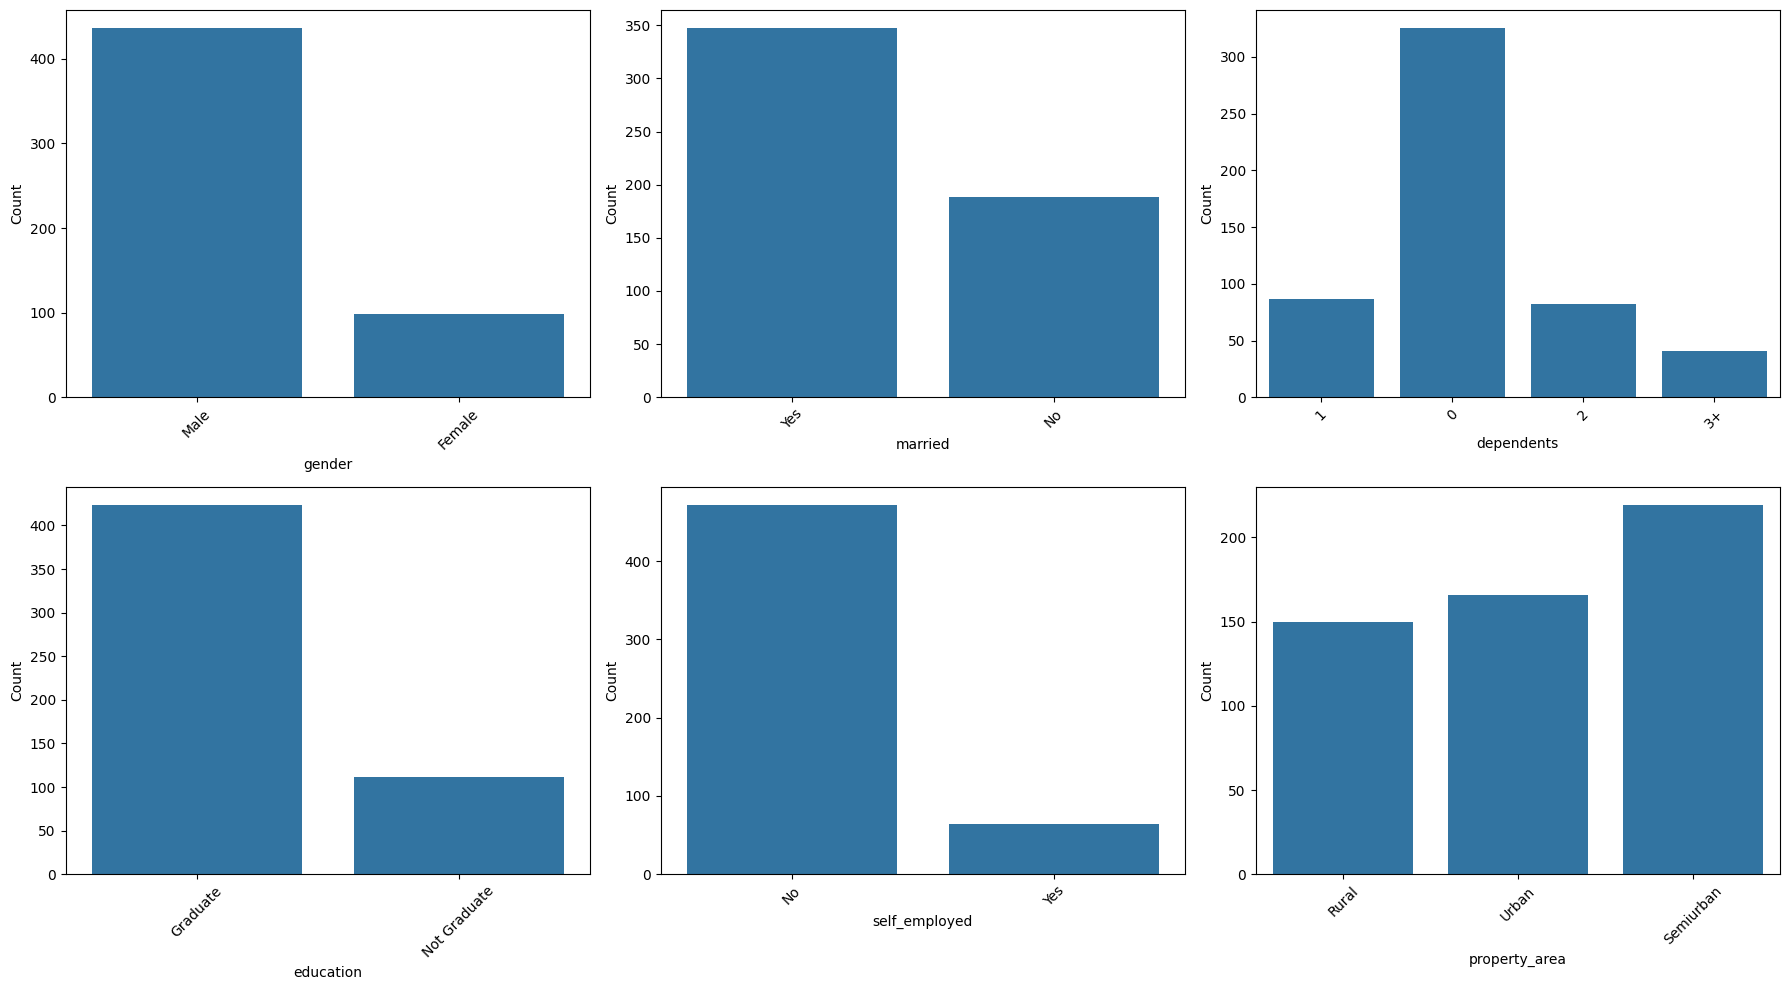

In [ ]:
# Plotting of categorical features.
categorical_cols = ['gender', 'married', 'dependents', 'education', 'self_employed', 'property_area']

fig, axs = plt.subplots(2, 3, figsize=(18, 10))
axs = axs.flatten()

for i, col in enumerate(categorical_cols):
    sns.countplot(x=col, data=data, ax=axs[i])
    axs[i].set_xlabel(col)
    axs[i].set_ylabel('Count')
    axs[i].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

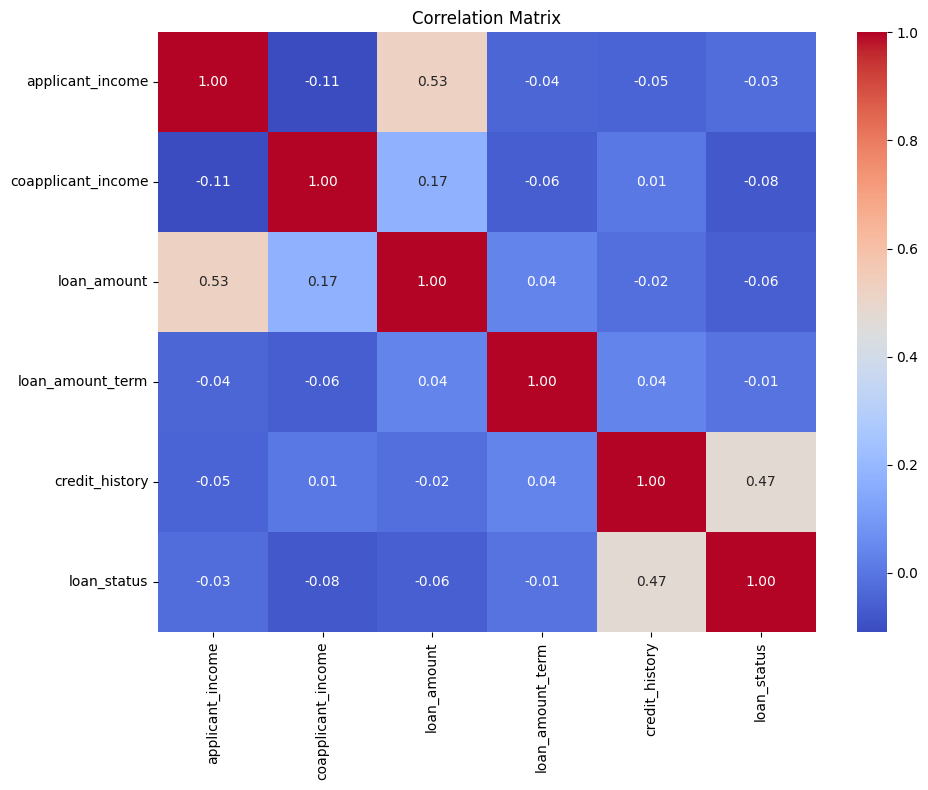

In [ ]:
# Creating a correlation matrix, to see the correaltion between the numerical features and the target feature.
heatmap_feutures = ['applicant_income', 'coapplicant_income', 'loan_amount', 'loan_amount_term', 'credit_history','loan_status']

def plotCorrelationMatrix(data, figsize=(5, 5)):

    corr = data.corr()

    plt.figure(figsize=figsize)

    sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size": 10})

    plt.title('Correlation Matrix')
    plt.tight_layout()

    plt.show()

plotCorrelationMatrix(data[heatmap_feutures], figsize=(10, 8))

In [ ]:
# Splitting the data into target and features.
target = data['loan_status']
features = data.drop('loan_status', axis=1)

In [ ]:
# Do an 80/20 train test split.
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

In [ ]:
# Encoding of the categorical features.
categorical_features = ['gender', 'married', 'dependents', 'education', 'self_employed', 'property_area']

label_encoders = {}

for col in categorical_features:
    le = LabelEncoder()
    X_train[col] = le.fit_transform(X_train[col].astype(str))
    X_test[col] = le.transform(X_test[col].astype(str))
    label_encoders[col] = le

In [ ]:
# Scaling the X dataframe.
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# Applying the algorithm.
model = LogisticRegression()
model.fit(X_train_scaled, y_train)

LogisticRegression()

In [ ]:
# Getting the predictions.
y_pred = model.predict(X_test_scaled)

Accuracy: 0.8037
Precision: 0.8450
Recall: 0.8037
F1-score: 0.7564

Confusion Matrix:


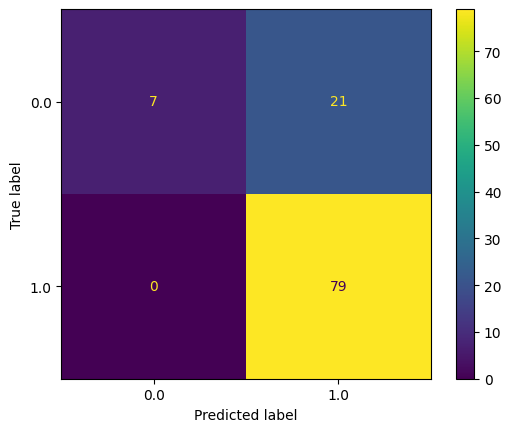

In [ ]:
# Calculating the metrics and visualizing the confusion matrix.
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
conf_matrix = confusion_matrix(y_test, y_pred)


print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")
print("\nConfusion Matrix:")
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=model.classes_) # Assuming model.classes_ gives the class labels
disp.plot()
plt.show()